## Brief Description of Project and Dataset: 

The dataset of the project is about **hotel booking demand**. 
The dataset was taken from Kaggle website. You can access by press on [***hotel booking demand***](https://www.kaggle.com/jessemostipak/hotel-booking-demand).

The data set contains 119,390 rows and 32 features.It represents the reservation records for two hotels in Portugal, but I’m not interested in these specific hotels. The project is about hotels in general. Especially that the features in the dataset are typically reservations information required for every hotel. 

In this project we want to:
- ### **Predict whether the customer will cancel the booking or not.**
- ### **Exploring some business questions.**




#### Features Description: 

- Hotel: Dataset collected from two hotels. (H1) refer to hotel called a resort hotel and (H2) is a city hotel. 
- is_canceled: Value indicating if the booking was canceled (1) or not (0).
- Lead_Time: Number of days that elapsed between the entering date of the booking into the system and the arrival date.
- arrival_date_year: Year of arrival date.
- arrival_date_month: Month of arrival date with 12 categories: “January” to “December”.
- arrival_date_week_number: Week number of the arrival date.
- arrival_date_day_of_month: Day of the month of the arrival date.
- stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
- stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
- adults: Number of adults.
- children: Number of children.
- babies: Number of babies.
- meal: Type of meal booked,Categories are presented as: Undefined/SC – no meal package; BB – Bed & Breakfast HB –Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- country: Country of origin.
- market_segment: Market segment designation. In categories, ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
'Complementary', 'Groups', 'Undefined', 'Aviation'].
- distribution_channel: Booking distribution channel. ['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'].
- is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0).
- previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking.
- previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking.
- reserved_room_type: Code of room type reserved. 
- assigned_room_type: Code for the type of room assigned to the booking.
- booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the system until the moment of check-in or cancellation.
- deposit_type: No Deposit, Non Refund: a deposit was made in the value of the total stay cost, Refundable, a deposit was made with a value under the total cost of stay.
- agent: ID of the travel agency that made the booking.
- company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
- days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer Indication on if the customer made a deposit to guarantee the booking. 
- customer_type: Type of booking, assuming one of four categories:Contract, Group, Transient, Transient-party
- adr: Average Daily Rate, Calculated by dividing the sum of all lodging transactions by the total number of staying nights.
- required_car_parking_spaces: Number of car parking spaces required by the customer.
- total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor).
- reservation_status: Reservation last status, assuming one of three categories: Canceled,Check-Out,No-Show
- Date: at which the last status was set. 


# 1- Loading Libraries

In [1]:
# All imports require in the project 

#-----------data manipulation----------------
import numpy as np
import pandas as pd 

#---------------plotting---------------------
import matplotlib.pyplot as plt
import seaborn as sns

#---------------preprocessing----------------
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#---------------Modeling---------------------
from sklearn import model_selection, preprocessing, feature_selection, linear_model, metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

# 2 - Dataset Loading and Overview

In [84]:
# Load data
df = pd.read_csv('hotel_bookings.csv') 

In [85]:
pd.set_option('display.max_columns', None) # Set the option to display all the columns in the Data set
df.head() 

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [86]:
df.shape # number of rows , columns

(119390, 32)

In [87]:
df.info() # Information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The data set contains 119390 entries and 32 columns: which 20 Numerical features and 12 categorical. 

In [88]:
df.describe().T # Generate descriptive statistics for every features in data set

count         mean         std      min  \
is_canceled                     119390.0     0.370416    0.482918     0.00   
lead_time                       119390.0   104.011416  106.863097     0.00   
arrival_date_year               119390.0  2016.156554    0.707476  2015.00   
arrival_date_week_number        119390.0    27.165173   13.605138     1.00   
arrival_date_day_of_month       119390.0    15.798241    8.780829     1.00   
stays_in_weekend_nights         119390.0     0.927599    0.998613     0.00   
stays_in_week_nights            119390.0     2.500302    1.908286     0.00   
adults                          119390.0     1.856403    0.579261     0.00   
children                        119386.0     0.103890    0.398561     0.00   
babies                          119390.0     0.007949    0.097436     0.00   
is_repeated_guest               119390.0     0.031912    0.175767     0.00   
previous_cancellations          119390.0     0.087118    0.844336     0.00   
previous_bookings_not_canceled  119390.0     0.137097    1.497437     0.00   
booking_changes                 119390.0     0.221124    0.652306     0.00   
agent                           103050.0    86.693382  110.774548     1.00   
company                           6797.0   189.266735  131.655015     6.00   
days_in_waiting_list            119390.0     2.321149   17.594721     0.00   
adr                             119390.0   101.831122   50.535790    -6.38   
required_car_parking_spaces     119390.0     0.062518    0.245291     0.00   
total_of_special_requests       119390.0     0.571363    0.792798     0.00   

                                    25%       50%     75%     max  
is_canceled                        0.00     0.000     1.0     1.0  
lead_time                         18.00    69.000   160.0   737.0  
arrival_date_year               2016.00  2016.000  2017.0  2017.0  
arrival_date_week_number          16.00    28.000    38.0    53.0  
arrival_date_day_of_month          8.00    16.000    23.0    31.0  
stays_in_weekend_nights            0.00     1.000     2.0    19.0  
stays_in_week_nights               1.00     2.000     3.0    50.0  
adults                             2.00     2.000     2.0    55.0  
children                           0.00     0.000     0.0    10.0  
babies                             0.00     0.000     0.0    10.0  
is_repeated_guest                  0.00     0.000     0.0     1.0  
previous_cancellations             0.00     0.000     0.0    26.0  
previous_bookings_not_canceled     0.00     0.000     0.0    72.0  
booking_changes                    0.00     0.000     0.0    21.0  
agent                              9.00    14.000   229.0   535.0  
company                           62.00   179.000   270.0   543.0  
days_in_waiting_list               0.00     0.000     0.0   391.0  
adr                               69.29    94.575   126.0  5400.0  
required_car_parking_spaces        0.00     0.000     0.0     8.0  
total_of_special_requests          0.00     0.000     1.0     5.0

# 3- Data Cleaning 

In [89]:
df.isnull().sum() #check the null values in features 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The feature that has null values are:
- <span style='background :yellow' > children</span>
- <span style='background :yellow' > country </span>
- <span style='background :yellow' > agent </span>
- <span style='background :yellow' > company </span>

### Dealing with missing values 

Children has 4 missing value: 

In [90]:
df[df['children'].isna()]

hotel  is_canceled  lead_time  arrival_date_year  \
40600  City Hotel            1          2               2015   
40667  City Hotel            1          1               2015   
40679  City Hotel            1          1               2015   
41160  City Hotel            1          8               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40600             August                        32                          3   
40667             August                        32                          5   
40679             August                        32                          5   
41160             August                        33                         13   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
40600                        1                     0       2       NaN   
40667                        0                     2       2       NaN   
40679                        0                     2       3       NaN   
41160                        2                     5       2       NaN   

       babies meal country market_segment distribution_channel  \
40600       0   BB     PRT      Undefined            Undefined   
40667       0   BB     PRT         Direct            Undefined   
40679       0   BB     PRT      Undefined            Undefined   
41160       0   BB     PRT      Online TA            Undefined   

       is_repeated_guest  previous_cancellations  \
40600                  0                       0   
40667                  0                       0   
40679                  0                       0   
41160                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
40600                               0                  B                  B   
40667                               0                  B                  B   
40679                               0                  B                  B   
41160                               0                  B                  B   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
40600                0   No Deposit    NaN      NaN                     0   
40667                0   No Deposit   14.0      NaN                     0   
40679                0   No Deposit    NaN      NaN                     0   
41160                0   No Deposit    9.0      NaN                     0   

         customer_type   adr  required_car_parking_spaces  \
40600  Transient-Party  12.0                            0   
40667  Transient-Party  12.0                            0   
40679  Transient-Party  18.0                            0   
41160  Transient-Party  76.5                            0   

       total_of_special_requests reservation_status reservation_status_date  
40600                          1           Canceled              2015-08-01  
40667                          1           Canceled              2015-08-04  
40679                          2           Canceled              2015-08-04  
41160                          1           Canceled              2015-08-09

In [91]:
# I replace the missing values with mode of children column
children_mode = df['children'].mode()[0]
df['children'].fillna(children_mode, inplace=True)

- Actually depen on my data set I will drop agent and company features because it represented by numbers instead of the name for anonymity reasons.
- Also I will drop hotel features becouse I’m not interested in these specific hotels. The project is about hotels in general especially that the data set has a general information required in every hotel in the wolrd.

In [92]:
dropped_features = ['company', 'agent', 'country', 'hotel']
df.drop(columns= dropped_features , inplace = True)

In [93]:
# Check again the missing values after handling. 
df.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

In [94]:
# It is repeated data about the date which the data set has five features with the same information in a different way
droped_features2 = ['reservation_status_date' , 'arrival_date_week_number']
df.drop(columns= droped_features2 , inplace = True)

In [95]:
df.shape

(119390, 26)

#### Check if there exists duplicate data

In [96]:
df.duplicated().value_counts()

False    85322
True     34068
dtype: int64

According the result we have 34068 duplicate data, so I will drop it.

In [97]:
df.drop_duplicates(inplace=True)

There are rows in the data set that has no specified number of individuals in the reservation.

In [98]:
unspecified_individuals = df[(df['adults'] == 0) & (df['children'] == 0) &  (df['babies'] == 0)]
unspecified_individuals

is_canceled  lead_time  arrival_date_year arrival_date_month  \
2224              0          1               2015            October   
2409              0          0               2015            October   
3181              0         36               2015           November   
3684              0        165               2015           December   
3708              0        165               2015           December   
...             ...        ...                ...                ...   
115029            0        107               2017               June   
115091            0          1               2017               June   
116251            0         44               2017               July   
116534            0          2               2017               July   
117087            0        170               2017               July   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  children  babies meal market_segment  \
2224                       3       0       0.0       0   SC      Corporate   
2409                       0       0       0.0       0   SC      Corporate   
3181                       2       0       0.0       0   SC         Groups   
3684                       4       0       0.0       0   SC         Groups   
3708                       4       0       0.0       0   SC         Groups   
...                      ...     ...       ...     ...  ...            ...   
115029                     3       0       0.0       0   BB      Online TA   
115091                     1       0       0.0       0   SC  Complementary   
116251                     1       0       0.0       0   SC      Online TA   
116534                     5       0       0.0       0   SC      Online TA   
117087                     2       0       0.0       0   BB  Offline TA/TO   

       distribution_channel  is_repeated_guest  previous_cancellations  \
2224              Corporate                  0                       0   
2409              Corporate                  0                       0   
3181                  TA/TO                  0                       0   
3684                  TA/TO                  0                       0   
3708                  TA/TO                  0                       0   
...                     ...                ...                     ...   
115029                TA/TO                  0                       0   
115091               Direct                  0                       0   
116251                TA/TO                  0                       0   
116534                TA/TO                  0                       0   
117087                TA/TO                  0                       0   

        previous_bookings_not_canceled reserved_room_type assigned_room_type  \
2224                                 0                  A                  I   
2409                                 0                  A                  I   
3181                                 0                  A                  C   
3684                                 0                  A                  A   
3708                                 0                  A                  C   
...                                ...                ...                ...   
115029      

In [99]:
df.drop(unspecified_individuals.index, inplace = True) # 166 rows 

In [100]:
df.shape

(85157, 26)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85157 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     85157 non-null  int64  
 1   lead_time                       85157 non-null  int64  
 2   arrival_date_year               85157 non-null  int64  
 3   arrival_date_month              85157 non-null  object 
 4   arrival_date_day_of_month       85157 non-null  int64  
 5   stays_in_weekend_nights         85157 non-null  int64  
 6   stays_in_week_nights            85157 non-null  int64  
 7   adults                          85157 non-null  int64  
 8   children                        85157 non-null  float64
 9   babies                          85157 non-null  int64  
 10  meal                            85157 non-null  object 
 11  market_segment                  85157 non-null  object 
 12  distribution_channel           

# 4- EDA

In [102]:
# check the balance of the target
num_canceled = len(df[df['is_canceled'] == 1])/(len(df['is_canceled']))*100
num_notcanceled = len(df[df['is_canceled'] == 0])/(len(df['is_canceled']))*100

<Figure size 1728x432 with 0 Axes>

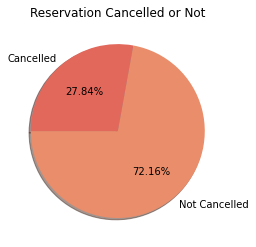

In [103]:
plt.figure(figsize=(24,6))
labels = 'Not Cancelled', 'Cancelled'
sizes = [num_notcanceled,num_canceled] 

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%0.2f%%',
        shadow=True, startangle=180,center=(0, 0));
plt.title('Reservation Cancelled or Not')
plt.show()

As we noticed that we have imbalanced data

Which months has highest cancellation ?

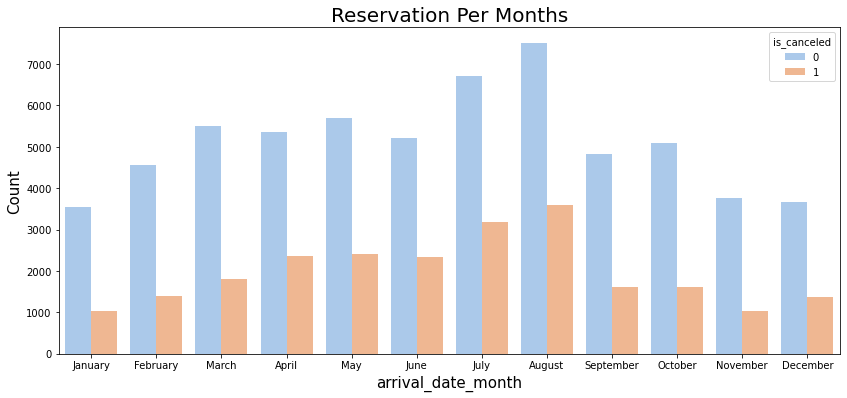

In [104]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(14,6))
sns.countplot(x='arrival_date_month',data=df,hue='is_canceled',palette='pastel', order=month_sorted)

plt.xlabel('arrival_date_month', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.title('Reservation Per Months',fontsize = 20, color='black');
plt.show()

Feature Arrival Date month doesn't relate to the target **(is_cancelation)**. 
The cancelation here is relatively dependent on the whole reservation.
But we can explore business questions from that is the **August month has the highest reservation**.

In [106]:
import plotly.express as px
fig = px.box(df, x="market_segment", y="lead_time", color="market_segment", boxmode="overlay")
fig.update_traces(quartilemethod="inclusive")
fig['layout'].update(height=500, width=800, title='Lead Time Boxplot by Market Segment')
fig.show()

how to deal with outlier ? 
Outliers can have a dramatic impact on linear regression. It can change the model equation completely i.e. bad prediction or estimation. Look at the below scatter plot and linear equation with or without outlier.

Note: I had to run these to use plotly libraries
- pip list | grep plotl
- conda install -c plotly plotly=4.8.1

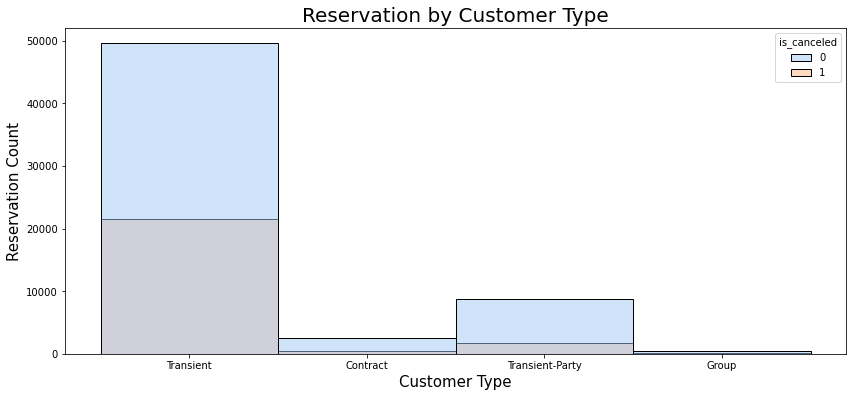

In [107]:
plt.figure(figsize=(14,6))
sns.histplot(x='customer_type',data=df,hue='is_canceled', bins = 50,palette='pastel')

plt.xlabel('Customer Type', fontsize = 15);
plt.ylabel('Reservation Count', fontsize = 15);
plt.title('Reservation by Customer Type',fontsize = 20, color='black');
plt.show()

There is a notices related in customer type and the cancelation 
it's apear that the transient customer type has frequently cancelation compared to other types. We must definitely consider **customer_type** in our model.

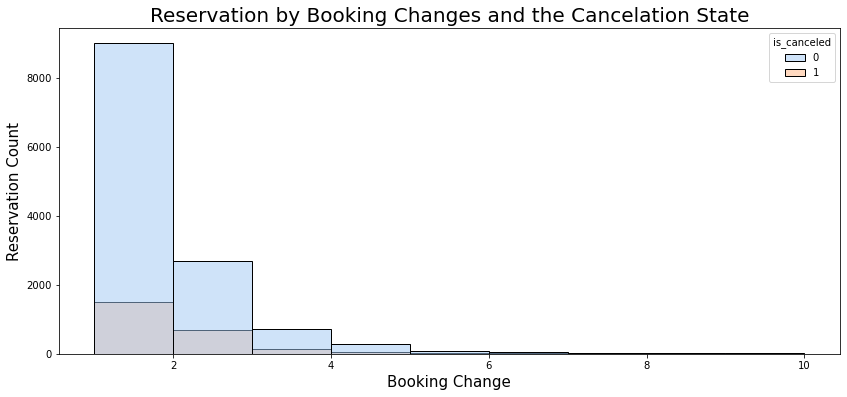

In [108]:
plt.figure(figsize=(14,6))
bins = [1, 2, 3, 4, 5, 6,7,8,9,10]
sns.histplot(x='booking_changes', data=df, hue='is_canceled', bins=bins,palette='pastel', edgecolor="black", color="#69b3a2", alpha=0.5)

plt.xlabel('Booking Change', fontsize = 15);
plt.ylabel('Reservation Count', fontsize = 15);
plt.title('Reservation by Booking Changes and the Cancelation State',fontsize = 20, color='black');

plt.show()

Here it is a numerical relationship appears that **as much as the number of booking changes, the cancelation reduce**.

In [109]:
sns.set_palette('flare') # to determine the palette color

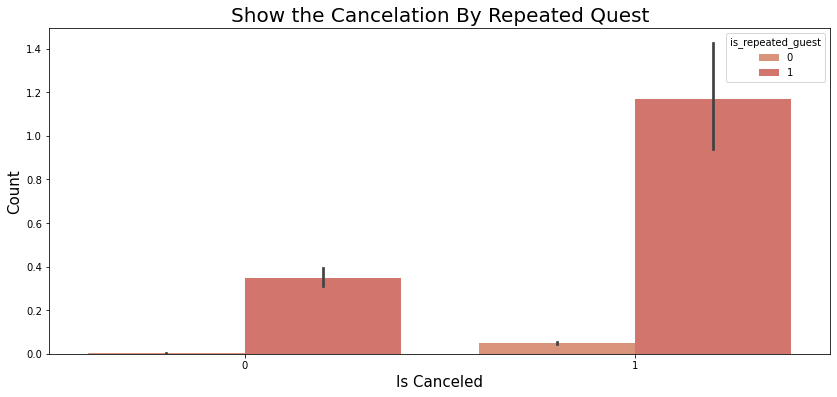

In [110]:
plt.figure(figsize=(14,6))
sns.barplot(x = df["is_canceled"], y = df["previous_cancellations"], hue = df["is_repeated_guest"]);
plt.xlabel('Is Canceled', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.title('Show the Cancelation By Repeated Quest',fontsize = 20, color='black');
plt.show()

Customers with the history of cancellation tend to cancel more often.
Interestingly repeated guests tend to cancel more!

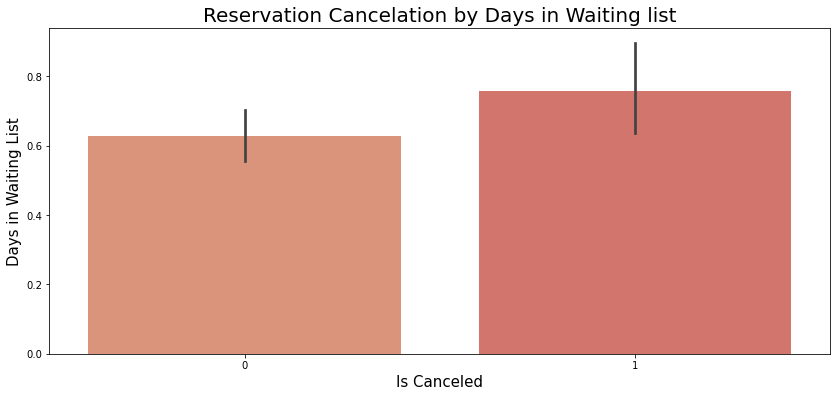

In [111]:
plt.figure(figsize=(14,6))
sns.barplot(x = df["is_canceled"], y = df["days_in_waiting_list"]);

plt.xlabel('Is Canceled', fontsize = 15);
plt.ylabel('Days in Waiting List', fontsize = 15);
plt.title('Reservation Cancelation by Days in Waiting list',fontsize = 20, color='black');
plt.show()

More days in waiting list, more chance of cancelling

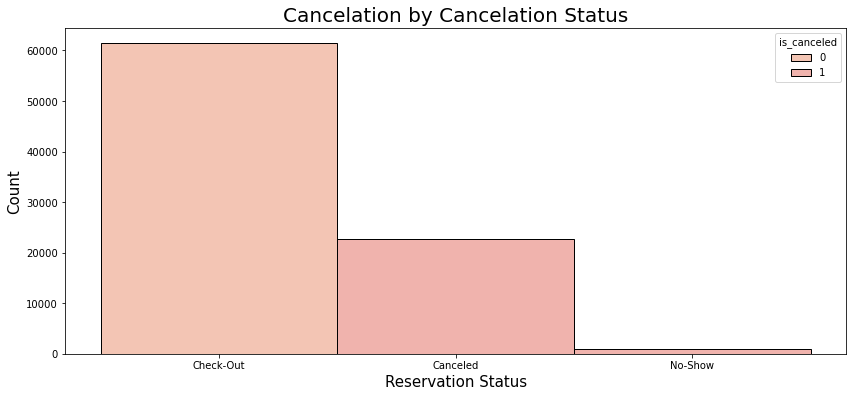

In [112]:
plt.figure(figsize=(14,6))
sns.histplot(x='reservation_status',data=df,hue='is_canceled', bins = 50);

plt.xlabel('Reservation Status', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.title('Cancelation by Cancelation Status',fontsize = 20, color='black');

It appears that is_canceled feature and reservation_status is the same result with different data type so, reservation_status definitely must **drop**.

In [113]:
df.drop(columns='reservation_status', inplace = True)

<Figure size 1008x432 with 0 Axes>

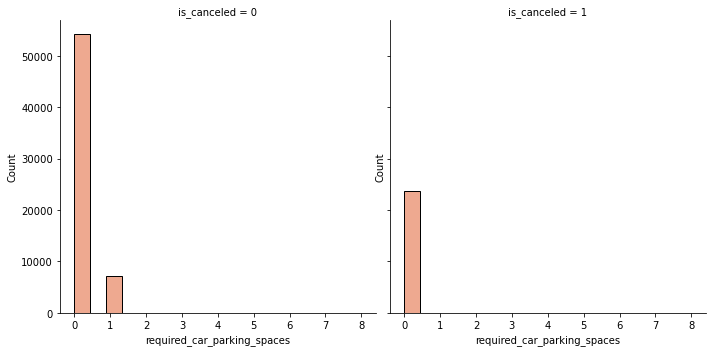

In [114]:
plt.figure(figsize=(14,6))
sns.displot(data=df, x='required_car_parking_spaces', col='is_canceled');

plt.ylabel('Count', fontsize = 10);
plt.show();

When request parking spaces the probability of reservation cancelation decrease

<Figure size 1008x432 with 0 Axes>

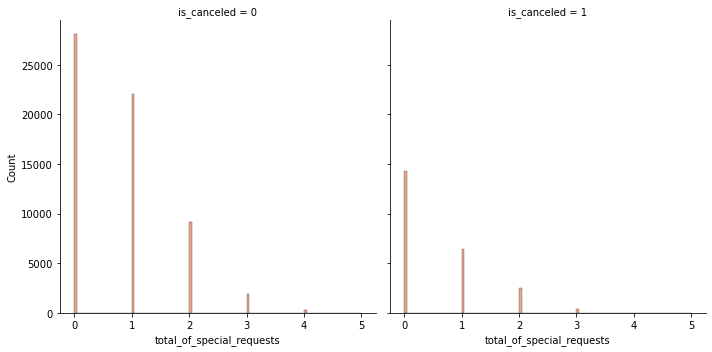

In [115]:
plt.figure(figsize=(14,6))
sns.displot(data=df, x='total_of_special_requests', col='is_canceled');

Contrary to what I expected، it appears that the total_of_special_request features **not correlated** with the cancelation. Because even if there have requests the reservation may cancel.

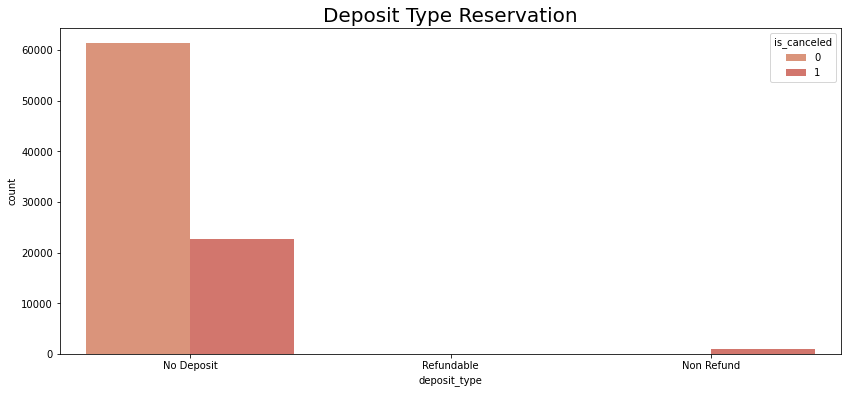

In [116]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='deposit_type',hue='is_canceled');

plt.title('Deposit Type Reservation',fontsize = 20, color='black');

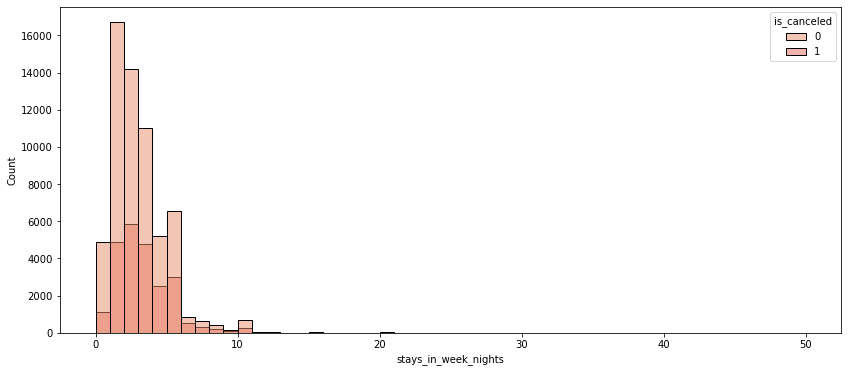

In [117]:
plt.figure(figsize=(14,6))
sns.histplot(x='stays_in_week_nights',data=df,hue='is_canceled', bins = 50)
plt.show()

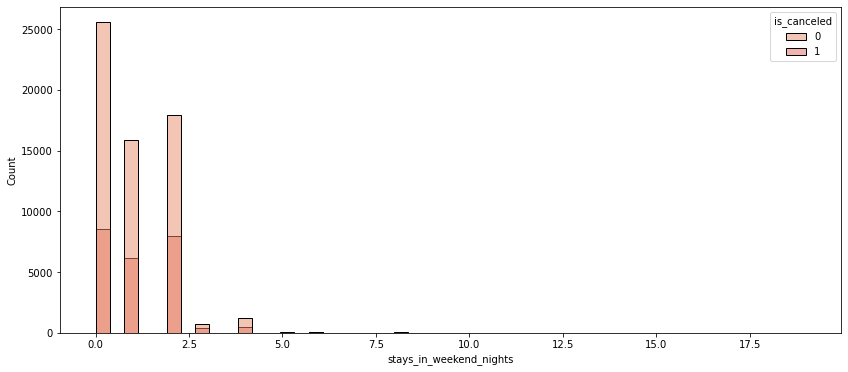

In [118]:
plt.figure(figsize=(14,6))
sns.histplot(x='stays_in_weekend_nights',data=df,hue='is_canceled', bins = 50)
plt.show()

In [119]:
weekend_cnaceled = len(df[(df['stays_in_weekend_nights'] != 0 ) & (df['is_canceled'] == 1)])
week_canceled = len(df[(df['stays_in_week_nights'] != 0 ) & (df['is_canceled'] == 1)])
week_weekend_cancelation = len(df[(df['stays_in_week_nights'] != 0 ) & (df['stays_in_weekend_nights'] != 0 ) & (df['is_canceled'] == 1)])
print('Number of cancelation in Weekend days is: ', weekend_cnaceled)
print('Number of cancelation in Week days is: ', week_canceled)
print('Number of cancelation happed with both stays in Week and Weekend days is: ', week_weekend_cancelation)

Number of cancelation in Weekend days is:  15158
Number of cancelation in Week days is:  22592
Number of cancelation happed with both stays in Week and Weekend days is:  14062


In [120]:
fig = px.box(df, x="reserved_room_type", y="booking_changes", color="reserved_room_type", boxmode="overlay")
fig['layout'].update(height=500, width=850, title='Booking Changes based on Room Type')
fig.update_traces(quartilemethod="inclusive")
fig.show()

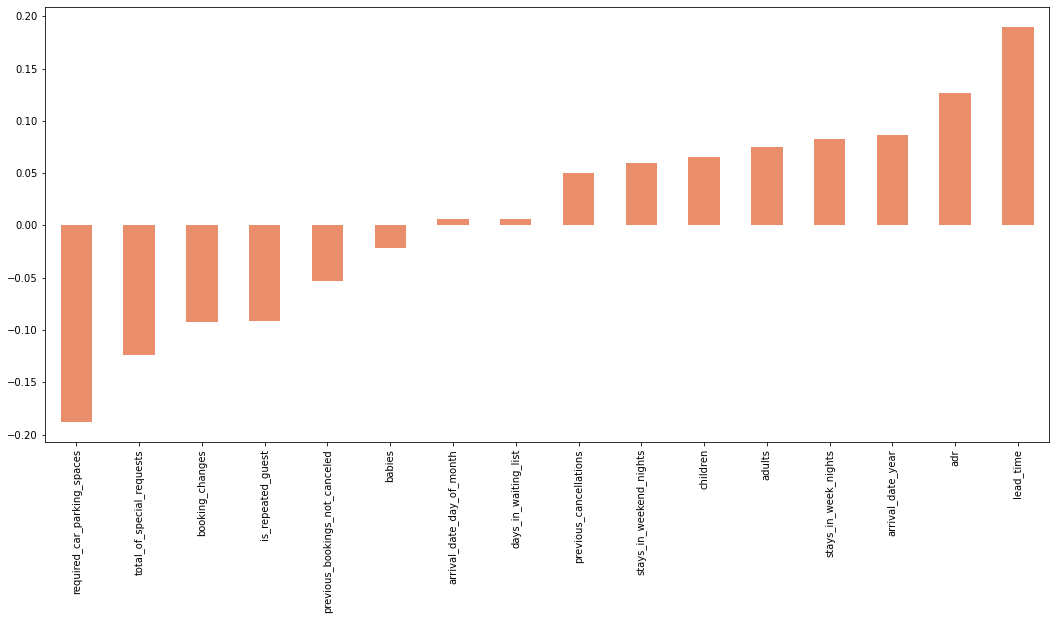

In [121]:
plt.figure(figsize=(18,8))
df.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()

# 5- Feature Engineering and Selections

In [122]:
df['total_number_of_individuals'] = df['adults'] + df['children'] + df['babies']

In [123]:
df.head()

is_canceled  lead_time  arrival_date_year arrival_date_month  \
0            0        342               2015               July   
1            0        737               2015               July   
2            0          7               2015               July   
3            0         13               2015               July   
4            0         14               2015               July   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies meal market_segment distribution_channel  \
0       2       0.0       0   BB         Direct               Direct   
1       2       0.0       0   BB         Direct               Direct   
2       1       0.0       0   BB         Direct               Direct   
3       1       0.0       0   BB      Corporate            Corporate   
4       2       0.0       0   BB      Online TA                TA/TO   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

  reserved_room_type assigned_room_type  booking_changes deposit_type  \
0                  C                  C                3   No Deposit   
1                  C                  C                4   No Deposit   
2                  A                  C                0   No Deposit   
3                  A                  A                0   No Deposit   
4                  A                  A                0   No Deposit   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests  total_number_of_individuals  
0                          0                          2.0  
1                          0                          2.0  
2                          0                          1.0  
3                          0                          1.0  
4                          1                          2.0

In [124]:
unnecessary_features = ['meal','market_segment','distribution_channel','adults','children','babies']
df.drop(columns= unnecessary_features, inplace = True)

In [125]:
df.shape

(85157, 20)

We have a lot of object features so we want convert categorical variable into dummy variables before modeling

In [126]:
df_dummeies = pd.get_dummies(df ,drop_first=True)

In [127]:
df_dummeies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85157 entries, 0 to 119389
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     85157 non-null  int64  
 1   lead_time                       85157 non-null  int64  
 2   arrival_date_year               85157 non-null  int64  
 3   arrival_date_day_of_month       85157 non-null  int64  
 4   stays_in_weekend_nights         85157 non-null  int64  
 5   stays_in_week_nights            85157 non-null  int64  
 6   is_repeated_guest               85157 non-null  int64  
 7   previous_cancellations          85157 non-null  int64  
 8   previous_bookings_not_canceled  85157 non-null  int64  
 9   booking_changes                 85157 non-null  int64  
 10  days_in_waiting_list            85157 non-null  int64  
 11  adr                             85157 non-null  float64
 12  required_car_parking_spaces    

Now all the features are numerical

# 6- Spliting Features
Now its time to split our data into a training set and a testing set!

In [128]:
#Assign X and Y
X=df_dummeies.drop(['is_canceled'],axis=1)
y=df_dummeies['is_canceled']

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 7- Train the Models and Make Predictions

### 7.1 Training a Logistic Regression Model

Standardize the features by subtract the mean and divide by the standard deviation. 

In [130]:
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

 Create Logistic Regression model then fit the training data.

In [148]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)# predict based on X_test which the model doesn't see it before 
lr_score = lr.score(X_train, y_train)# Training model score
lr_score

0.7648146788990826

In [132]:
print("Precision =",precision_score(y_test,y_pred))
print("Recall =",recall_score(y_test,y_pred))
print("F1 Score =",f1_score(y_test,y_pred))

Precision = 0.6562786434463794
Recall = 0.3040339702760085
F1 Score = 0.4155542658154382


In [133]:
print(confusion_matrix(y_test,y_pred))

[[11572   750]
 [ 3278  1432]]


### 7.2 Decision Tree Classifier Model

In [149]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
dtc_score = dtc.score(X_train, y_train)
dtc_score

0.9947302752293578

In [138]:
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     12322
           1       0.51      0.54      0.53      4710

    accuracy                           0.73     17032
   macro avg       0.67      0.67      0.67     17032
weighted avg       0.74      0.73      0.73     17032



In [139]:
print(f"Confusion Matrix : \n{conf}")

Confusion Matrix : 
[[9935 2387]
 [2176 2534]]


### 7.3 Random Forest Classifier Model

In [155]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_score = rfc.score(X_train, y_train)
rfc_score

0.9947302752293578

In [156]:
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     12322
           1       0.69      0.50      0.58      4710

    accuracy                           0.80     17032
   macro avg       0.76      0.71      0.72     17032
weighted avg       0.79      0.80      0.79     17032



In [147]:
confusion_matrix(y_test, y_pred_rfc)

array([[11277,  1045],
       [ 2330,  2380]])

# 8- Models Compare 

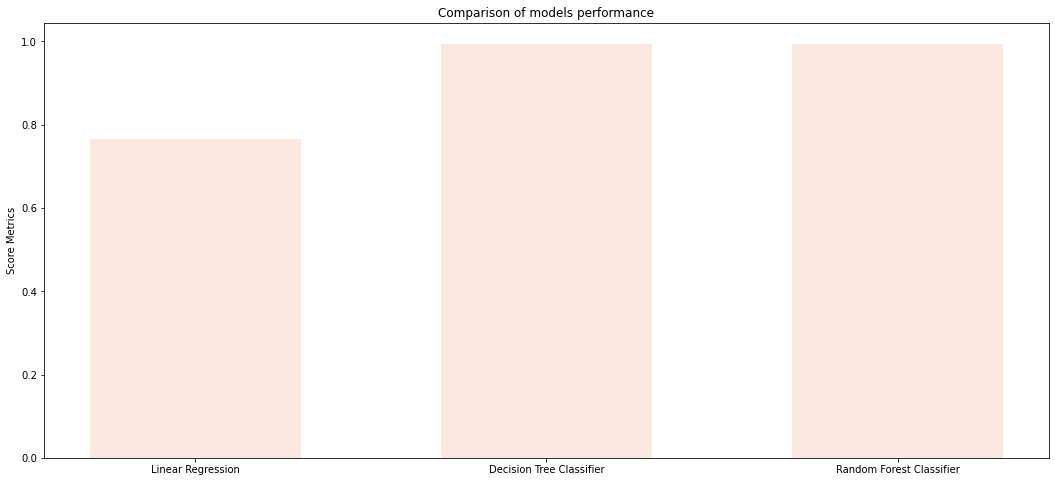

In [154]:
plt.figure(figsize=(18,8))
Model=('Linear Regression','Decision Tree Classifier', 'Random Forest Classifier')
performances = (lr_score,dtc_score,rfc_score)
position_y = np.arange(len(Model))
plt.bar(position_y ,performances,align ='center',alpha=0.2,width=0.6)
plt.xticks(position_y,Model)
plt.title('Comparison of models performance')
plt.ylabel('Score Metrics')
plt.show()

Both Decision Tree and Random Forest Models have best accuracy. but i will choose Random Forest model because it has a highly prediction score more than Decision Tree model.

# The End!